In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

from lib import tally, reorient

In [2]:
# Model
model = Sequential([
    Conv2D(filters=128, kernel_size=(3,3), padding='same', 
           activation='relu', input_shape = (40, 120, 1)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), padding='same', 
           activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=32, kernel_size=(3,3), padding='same', 
           activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=16, kernel_size=(3,3), 
           padding='same', activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation = "softmax")
])

In [3]:
# Load weights
model.load_weights(r"weights\weights-200epochs-20220614_1510.h5")

[Normal, Hole, Impurity] = ['[0.     0.9929 0.0071]']
Execution time: 31.915 ms


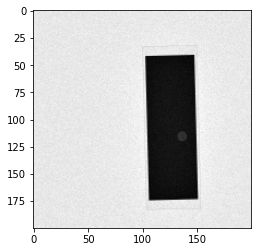

In [21]:
path = r"Data\Hole" # Change Normal, Hole, Impurity to import different types of simulated x-ray images.
fname = '0005.22' # There are 5 sample images, which runs from 0001.22 - 0005.22.

# Import image and preprocess it.
dimension = (200, 200, 1)
image_3d = tally.usrbin(os.path.join(path, fname), dimension)
image_2d = image_3d[:,:,0]
image_2d = (image_2d / image_2d.max() * -1) + 1
img_clean = reorient.reorient(image_2d)
img_norm = reorient.normalize(img_clean)
vol = img_norm

# Shows imported image.
plt.imshow(image_3d[:,:,0], cmap='gray')

# Expand dimensions from (40, 120) -> (1, 40, 120, 1) so that it fits in the model.
vol = np.expand_dims(vol, axis=-1)
vol = np.expand_dims(vol, axis=0)

# Put image into the model.
start_time = datetime.datetime.now()
result = model.predict(vol)
end_time = datetime.datetime.now()

# Calculate time taken to execute the model.
time_diff = end_time - start_time
execution_time = time_diff.total_seconds() * 1000

# Dispaly outcome of the model and the execution time.
x = list(map(lambda result :str(result), result.round(4)))
print('[Normal, Hole, Impurity] =', x)
print('Execution time:', execution_time, 'ms')

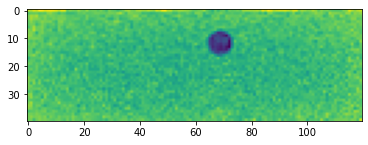

In [5]:
# Can see preprocessed image before it is fed into the network.
plt.imshow(img_norm)